In [25]:
!pip install kneed

In [26]:
#Here I'm importing the modules, numpy, pandas, sklearn, and kmeans.
import numpy as np
import pandas as pd
import csv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# !gunzip /content/drive/MyDrive/2020-Apr.csv.gz


In [29]:
#Here I'm setting up the data frame and loading the dataset
#I'm defining the number of rows we want to read.
df = pd.read_csv('/content/drive/MyDrive/2020-Apr.csv', nrows=10000000)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc
...,...,...,...,...,...,...,...,...,...
9999995,2020-04-07 09:38:51 UTC,view,12701961,2053013553199186187,NaN,cordiant,28.57,634522686,f52dde19-e38e-48a0-a6d0-581e32787fce
9999996,2020-04-07 09:38:51 UTC,view,100044127,2053013554415534427,electronics.video.tv,kenwood,103.48,571895457,855c0972-6068-46e5-bd5e-8e0cbd34f010
9999997,2020-04-07 09:38:51 UTC,view,2500566,2232732092565815652,appliances.kitchen.oven,asel,80.27,637799467,e284a279-893a-41de-85fa-31da48731356
9999998,2020-04-07 09:38:51 UTC,view,32801021,2232732095485051302,sport.trainer,NaN,174.40,629149981,5121f154-f6b5-4feb-9e14-cbc47cff9335


In [30]:
headers = df.columns
headers

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [31]:
#Here I'm checking the columns in the dataset.
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 686.6+ MB


In [33]:
#Here I'm dropping some of the features or columns (event_time and user_session)
df = df.drop(columns = ['event_time', 'user_session'])
df

,event_type,product_id,category_id,category_code,brand,price,user_id
0,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877
1,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500
2,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770
3,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778
4,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135
...,...,...,...,...,...,...,...
9999995,view,12701961,2053013553199186187,NaN,cordiant,28.57,634522686
9999996,view,100044127,2053013554415534427,electronics.video.tv,kenwood,103.48,571895457
9999997,view,2500566,2232732092565815652,appliances.kitchen.oven,asel,80.27,637799467
9999998,view,32801021,2232732095485051302,sport.trainer,NaN,174.40,629149981


In [34]:
#These are the main features. For each user event I'm grouping by to get the count of events.
#The goal here is to total frequency of events, the average spends, number of unique products, and number of unique brands.
user_features = df.groupby('user_id').agg(
    event_frequency=('event_type', 'count'),
    unique_products=('product_id', 'nunique'),
    unique_brands=('brand', 'nunique'),
    average_spend=('price', 'mean')
).reset_index()
user_features

,user_id,event_frequency,unique_products,unique_brands,average_spend
0,70609453,1,1,1,23.170
1,86517859,4,2,1,576.285
2,88582647,5,4,0,236.506
3,88627477,1,1,1,236.810
4,95388363,1,1,0,62.040
...,...,...,...,...,...
1053854,637799356,2,1,1,105.280
1053855,637799383,1,1,1,80.270
1053856,637799403,1,1,1,32.150
1053857,637799417,1,1,1,1541.870


In [35]:
#Here we are create scaling the dataset using the standardScaler
features = ['event_frequency', 'unique_products', 'unique_brands', 'average_spend']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_features[features])

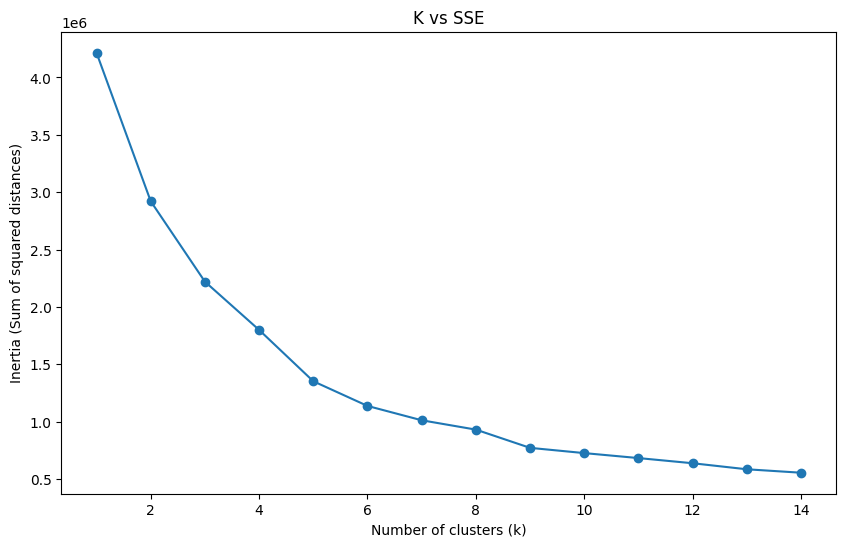

In [36]:
#Here we are experiementing with different K models to determine how many clusters they come up with.
#We are calculating inertia and storing it. It's used to calculate how the model performed.
sse = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('K vs SSE')
plt.show()

In [37]:
#Here I'm using the KneeLocator to determine the optimal K
kl = KneeLocator(K_range, sse, curve="convex", direction="decreasing")
print("Optimal k:", kl.elbow)

Optimal k: 5


In [38]:
#Based on the finding that 5 is the optimal K, we will get more details.
kmeans = KMeans(n_clusters=kl.elbow, random_state=42)
user_features['cluster'] = kmeans.fit_predict(scaled_data)
user_features

,user_id,event_frequency,unique_products,unique_brands,average_spend,cluster
0,70609453,1,1,1,23.170,0
1,86517859,4,2,1,576.285,0
2,88582647,5,4,0,236.506,0
3,88627477,1,1,1,236.810,0
4,95388363,1,1,0,62.040,0
...,...,...,...,...,...,...
1053854,637799356,2,1,1,105.280,0
1053855,637799383,1,1,1,80.270,0
1053856,637799403,1,1,1,32.150,0
1053857,637799417,1,1,1,1541.870,2


In [39]:
#Here we are showing the cluster counts. This shows how many users are in each cluster.
cluster_counts = user_features['cluster'].value_counts()
cluster_counts

,count
cluster,
0,743113
2,175796
4,123785
1,11164
3,1


In [40]:
#Here we are listing out the behavioral characterists of each cluster.
grouped = user_features.groupby('cluster')

for cluster, group in grouped:
    print(f"\nCluster {cluster} - Behavioral Characteristics:")

    # Calculate behavioral metrics for each cluster
    unique_users = group['user_id'].nunique()
    avg_activity = group['event_frequency'].mean()
    avg_spend = group['average_spend'].mean()
    avg_unique_products = group['unique_products'].mean()
    avg_unique_brands = group['unique_brands'].mean()

    # Print key characteristics of each cluster
    print(f"Number of users in the cluster: {unique_users}")
    print(f"Average activity frequency: {avg_activity:.2f}")
    print(f"Average unique products: {avg_unique_products:.2f}")
    print(f"Average spending: {avg_spend:.2f}")
    print(f"Average unique brands: {avg_unique_brands:.2f}")


Cluster 0 - Behavioral Characteristics:
Number of users in the cluster: 743113
Average activity frequency: 5.10
Average unique products: 2.87
Average spending: 197.14
Average unique brands: 1.64

Cluster 1 - Behavioral Characteristics:
Number of users in the cluster: 11164
Average activity frequency: 126.68
Average unique products: 63.28
Average spending: 261.83
Average unique brands: 20.15

Cluster 2 - Behavioral Characteristics:
Number of users in the cluster: 175796
Average activity frequency: 4.61
Average unique products: 2.83
Average spending: 1017.16
Average unique brands: 1.50

Cluster 3 - Behavioral Characteristics:
Number of users in the cluster: 1
Average activity frequency: 15064.00
Average unique products: 2292.00
Average spending: 214.26
Average unique brands: 107.00

Cluster 4 - Behavioral Characteristics:
Number of users in the cluster: 123785
Average activity frequency: 32.07
Average unique products: 17.56
Average spending: 268.70
Average unique brands: 7.53


In [41]:
def find_similar_cluster(new_user_features, scaler, kmeans_model):
    scaled_new_user_data = scaler.transform(new_user_features)
    predicted_cluster = kmeans_model.predict(scaled_new_user_data)
    print(predicted_cluster)
    return predicted_cluster[0]

In [42]:
# Read 500k data from the rest of the data to choose a random user to recommend products
df_remaining = pd.read_csv('/content/drive/MyDrive/2020-Apr.csv', skiprows=10000001,  names=headers, nrows=1000000)
df_remaining.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-07 09:38:51 UTC,view,1005160,2232732093077520756,construction.tools.light,xiaomi,202.81,634405643,b712eded-6e22-4ead-aafe-35ae6f5ac4e2
1,2020-04-07 09:38:52 UTC,view,11000157,2232732105811427975,appliances.kitchen.grill,smeg,183.76,512487507,32991af9-d8db-4360-b7d5-a0b981cbc4d2
2,2020-04-07 09:38:52 UTC,view,1005213,2232732093077520756,construction.tools.light,honor,643.49,519146290,fa094c4e-6536-4ba4-8585-fb73d142aea5
3,2020-04-07 09:38:52 UTC,cart,9200640,2232732104343421549,apparel.scarf,defender,20.19,620730390,5b92ec0e-c559-4bc8-acee-dc6d32f4beca
4,2020-04-07 09:38:52 UTC,view,4300374,2232732091483685190,NaN,ballu,64.33,513001403,47e3fb47-1800-459f-bb75-fbc674cdce15


In [43]:
df_remaining = df_remaining.drop(columns = ['event_time', 'user_session'])
df_remaining

,event_type,product_id,category_id,category_code,brand,price,user_id
0,view,1005160,2232732093077520756,construction.tools.light,xiaomi,202.81,634405643
1,view,11000157,2232732105811427975,appliances.kitchen.grill,smeg,183.76,512487507
2,view,1005213,2232732093077520756,construction.tools.light,honor,643.49,519146290
3,cart,9200640,2232732104343421549,apparel.scarf,defender,20.19,620730390
4,view,4300374,2232732091483685190,NaN,ballu,64.33,513001403
...,...,...,...,...,...,...,...
999995,view,100170577,2053013554658804075,electronics.audio.headphone,hp,424.32,634567524
999996,view,100124865,2070005009382114061,apparel.underwear,noname,9.01,625655562
999997,view,100134840,2232732104788017783,appliances.kitchen.grill,lorelli,52.25,512658325
999998,view,26500161,2053013553140465927,kids.toys,trollbeads,100.90,552025269


In [46]:
random_user_id = df_remaining['user_id'].sample(1).iloc[0]
new_user_data = df_remaining[df_remaining['user_id'] == random_user_id].copy()

new_user_features_df = new_user_data.groupby('user_id').agg(
    event_frequency=('event_type', 'count'),
    unique_products=('product_id', 'nunique'),
    unique_brands=('brand', 'nunique'),
    average_spend=('price', 'mean')
).reset_index()

predicted_cluster = find_similar_cluster(new_user_features_df[features], scaler, kmeans)

print(f"New user ID: {random_user_id}")
print(f"Predicted cluster: {predicted_cluster}")

[4]
New user ID: 609515041
Predicted cluster: 4


In [47]:
cluster_users = user_features[user_features['cluster'] == predicted_cluster]['user_id']
cluster_data = df[df['user_id'].isin(cluster_users)]

popular_products = cluster_data['product_id'].value_counts().reset_index()
popular_products.columns = ['product_id', 'count']

user_purchased_products = new_user_data[new_user_data['event_type'] == 'purchase']['product_id'].unique()
print("User's already purchased products: ", user_purchased_products)
popular_products = popular_products[~popular_products['product_id'].isin(user_purchased_products)]

top_n = 10
recommended_products = popular_products.head(top_n)

print(f"\nRecommended products for the new user (from cluster {predicted_cluster}):")
display(recommended_products)

User's already purchased products:  []

Recommended products for the new user (from cluster 4):


,product_id,count
0,1005100,23150
1,100068488,21083
2,1005212,18592
3,100011103,17421
4,1005160,17217
5,1004836,14871
6,1307555,11741
7,100068493,11557
8,1004856,11093
9,1004767,10761
